In [1]:
import matplotlib

In [2]:
from matplotlib import pyplot as plt

In [3]:
import pandas as pd

In [4]:
import seaborn as sns


In [5]:
df1 = pd.read_csv('Data/test.csv')
df2 = pd.read_csv('Data/gender_submission.csv')

df3 = pd.merge(df1, df2, on='PassengerId', how='inner')

df3.to_csv('Data/Down_titanic.csv', index=False)

df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [6]:
df3.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

From Above i can sum up that, we have 20-30% of null values in age and around 4 times more null values in Cabin. Lets try to replace those values or ignore that column, otherwise it disturbs the entire data.

In [8]:
df5 = pd.read_csv('Data/train.csv')

df5.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are too many null values in train dataset for 'Cabin' Column and it is difficult to drop them, as it changes entire data output

In [10]:
df6 = pd.read_csv('Data/Down_titanic.csv')
df7 = pd.read_csv('Data/train.csv')

imp_df = pd.concat([df6, df7], ignore_index=True)

imp_df.to_csv('Data/imp_titanic.csv', index=False)


imp_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [21]:
imp_df1 = pd.read_csv('Data/imp_titanic.csv')

imp_df1.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,True,False,False,False,False,True,False,False
1307,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

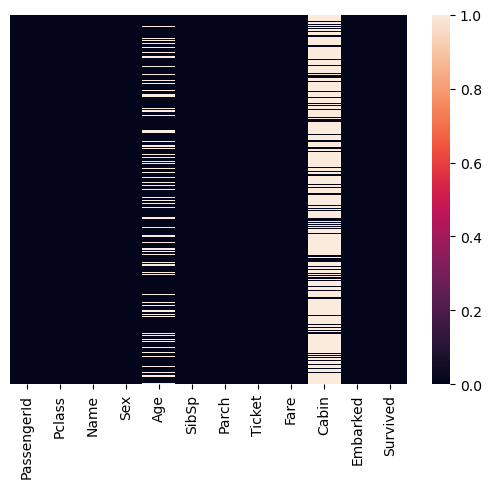

In [14]:
sns.heatmap(imp_df.isnull(),yticklabels=False)

There are too many null values in above combined dataset, which we cant ignore as it disturbs entire dataset

In [32]:
imp_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
Survival          0
Class             0
Gender            0
dtype: int64

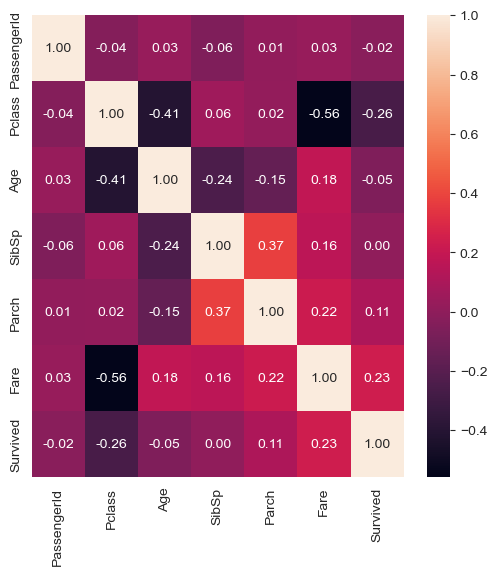

In [77]:
plt.figure(figsize=(6,6))
sns.heatmap(imp_df.corr(), annot=True, fmt='.2f')

plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

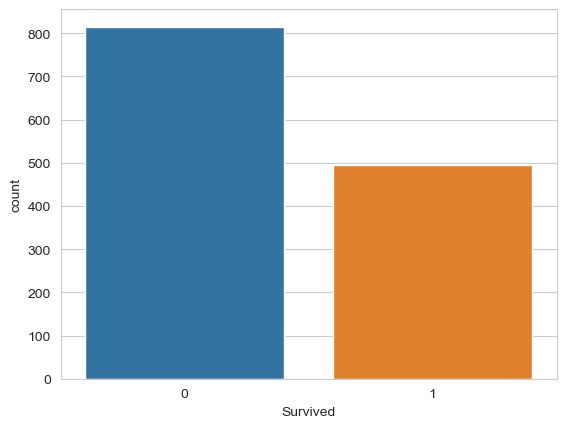

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=imp_df)

if survived is 0, it means person did not survive and survive is 1, it means person survived. From above, we can see, out of 1300 people, only around 500 people survived irrespective of gender.

<AxesSubplot:xlabel='Survived', ylabel='count'>

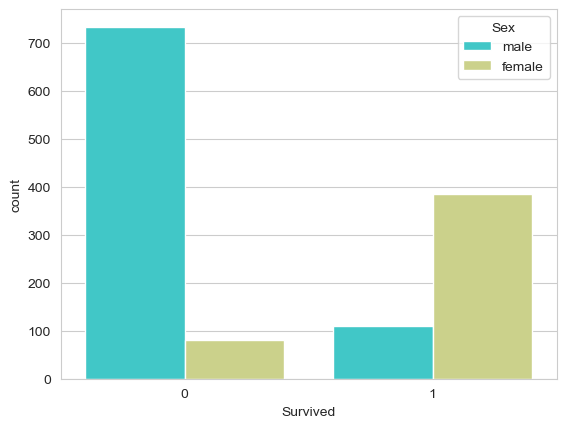

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=imp_df, palette='rainbow')

from above graph, i can find that, out of 1308 people on board, just a little over 100 male have survived and around 400 females have survived. And we can also infer, around 730 Men have died where as less than 100 female have survived.

In [26]:
# Create Survival Label Column
imp_df['Survival'] = imp_df.Survived.map({0 : 'Died', 1 : 'Survived'})
imp_df.Survival.head()

0        Died
1    Survived
2        Died
3        Died
4    Survived
Name: Survival, dtype: object

In [27]:
# Create Pclass Label Column
imp_df['Class'] = imp_df.Pclass.map({1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'})
imp_df.Class.head()

0    3rd Class
1    3rd Class
2    2nd Class
3    3rd Class
4    3rd Class
Name: Class, dtype: object

In [28]:
# Create Sex Label Column
imp_df['Gender'] = imp_df.Sex.map({'female' : 'Female', 'male' : 'Male'})
imp_df.Gender.head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: Gender, dtype: object

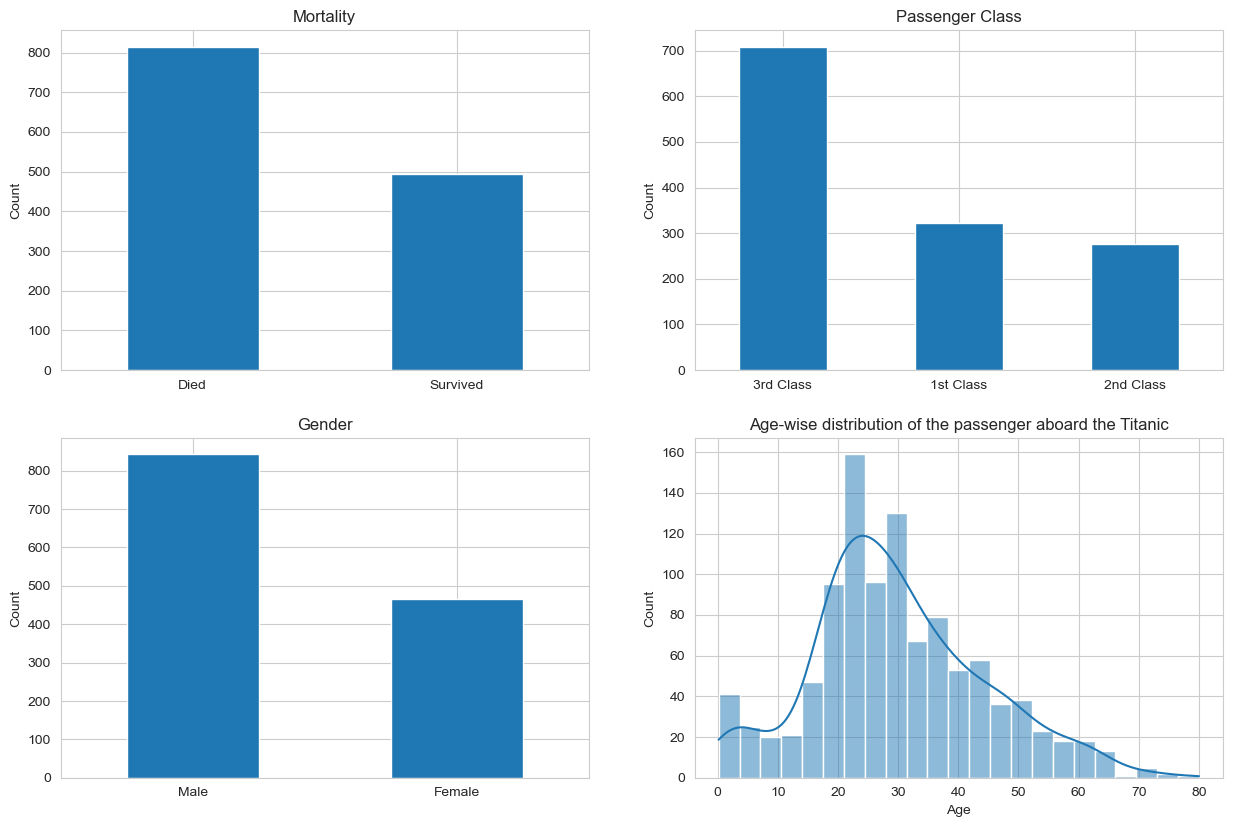

In [84]:

# Figure size
plt.rc('figure', figsize=(15, 15))
# Histogram bin size
bin_size = 10


# Plot mortality counts
plt.subplot2grid(fig_size, (0, 0))
imp_df['Survival'].value_counts().plot(kind='bar', title='Mortality')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 1))
imp_df['Class'].value_counts().plot(kind='bar', title='Passenger Class')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Gender counts
plt.subplot2grid(fig_size, (1, 0))
imp_df['Gender'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')


# Plot Age histogram
plt.subplot2grid(fig_size, (1, 1))
#Histogram of Age of the given data set(sample)
#plt.hist(imp_df['Age'].dropna())
sns.histplot(imp_df['Age'].dropna(), kde=True)
plt.ylabel('Count')
plt.title('Age-wise distribution of the passenger aboard the Titanic')
plt.show()

From Above Graph, we can observe that, there are lot of people who are in their 20s and 30s, And there are more
number of 3rd class passengers aboard the ship.

In [33]:
#dropping column not in use and having maximum number of null values i.e. Cabin column
df_cleaned = imp_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_cleaned.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Survival,Class,Gender
0,3,male,34.5,0,0,7.8292,Q,0,Died,3rd Class,Male
1,3,female,47.0,1,0,7.0000,S,1,Survived,3rd Class,Female
2,2,male,62.0,0,0,9.6875,Q,0,Died,2nd Class,Male
3,3,male,27.0,0,0,8.6625,S,0,Died,3rd Class,Male
4,3,female,22.0,1,1,12.2875,S,1,Survived,3rd Class,Female


In [86]:
df_cleaned['Age'].dropna()

0       34.5
1       47.0
2       62.0
3       27.0
4       22.0
        ... 
1303    39.0
1304    27.0
1305    19.0
1307    26.0
1308    32.0
Name: Age, Length: 1046, dtype: float64

In [34]:
df_cleaned.Embarked.unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [43]:
embark_group = df_cleaned.groupby('Embarked')['Embarked'].count()
embark_group

Embarked
C    270
Q    123
S    914
Name: Embarked, dtype: int64

In [90]:
df_cleaned.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479,0.377387
std,0.837836,14.413493,1.041658,0.865560,51.758668,0.484918
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


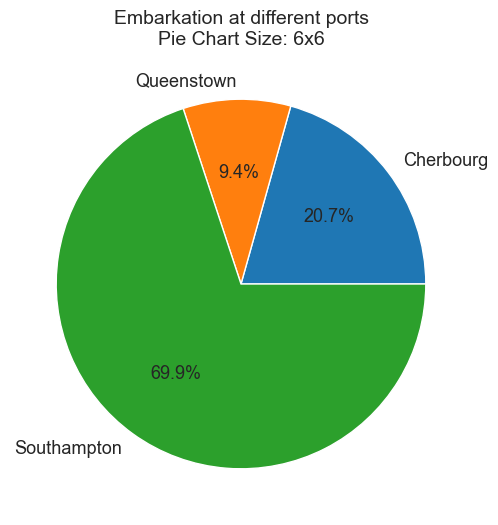

In [68]:
labels = ['Cherbourg', 'Queenstown', 'Southampton']

Values = embark_group.values

plt.figure(figsize=(6,6))

plt.pie(Values, labels=labels, autopct='%.1f%%', textprops={'fontsize':13})

plt.title('Embarkation at different ports\nPie Chart Size: 6x6', fontsize=14)

plt.show()







From Above, we can observe that most of the passengers have boarded in southampton

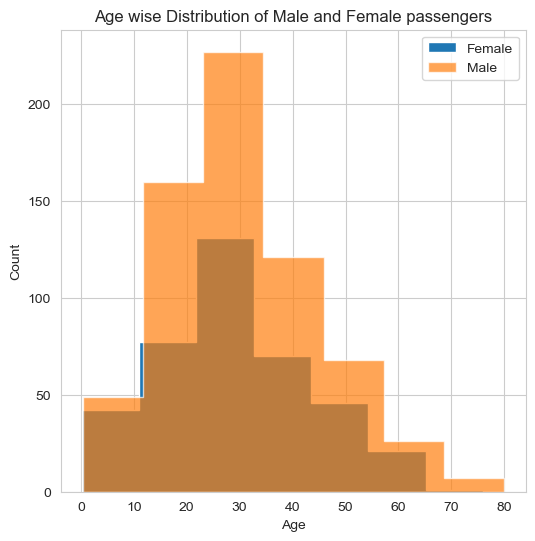

In [94]:
plt.figure(figsize=(6,6))
plt.hist(df_cleaned['Age'][(df_cleaned['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(df_cleaned['Age'][(df_cleaned['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()

From Above, we can observe that, there are more male and female from age group of 20 to 40

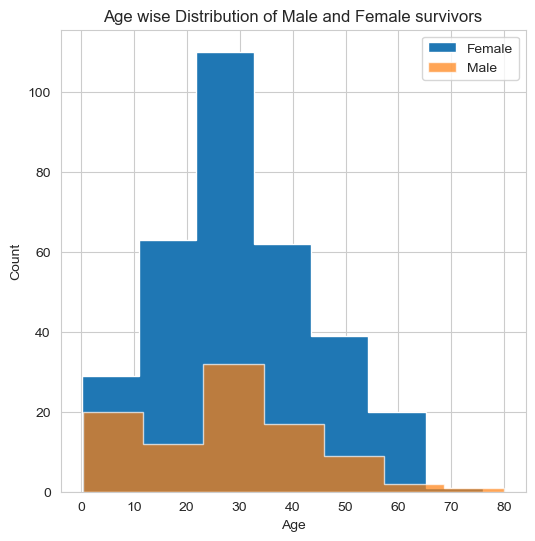

In [97]:
plt.figure(figsize=(6,6))
plt.hist(df_cleaned['Age'][(df_cleaned['Sex'] == 'female') & (df_cleaned['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(df_cleaned['Age'][(df_cleaned['Sex'] == 'male') & (df_cleaned['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()

From above, we can observe that, even though the entire count of male is less than female, at every age category, female have survived more than male. For age category of 25 to 35, the difference is more than double. So age has very important role to play in survival

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

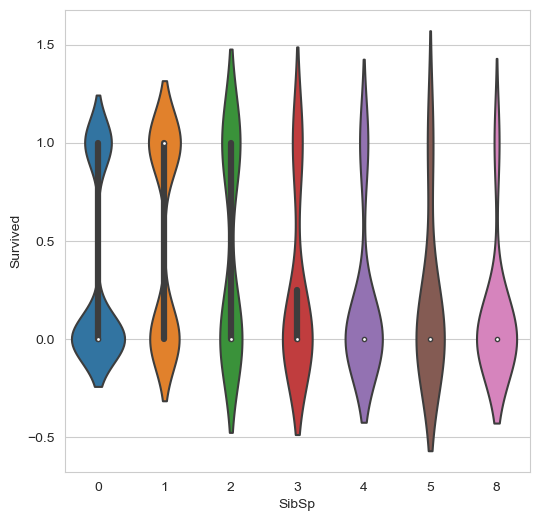

In [111]:
plt.figure(figsize=(6,6))
sns.violinplot(x="SibSp", y="Survived", data=df_cleaned)

We can observe that the people who have 1 sibling/spouse have survived more and those who doesnt have any, have died. And those who have 8 Sibling or Spouse also died more.

<Figure size 400x400 with 0 Axes>

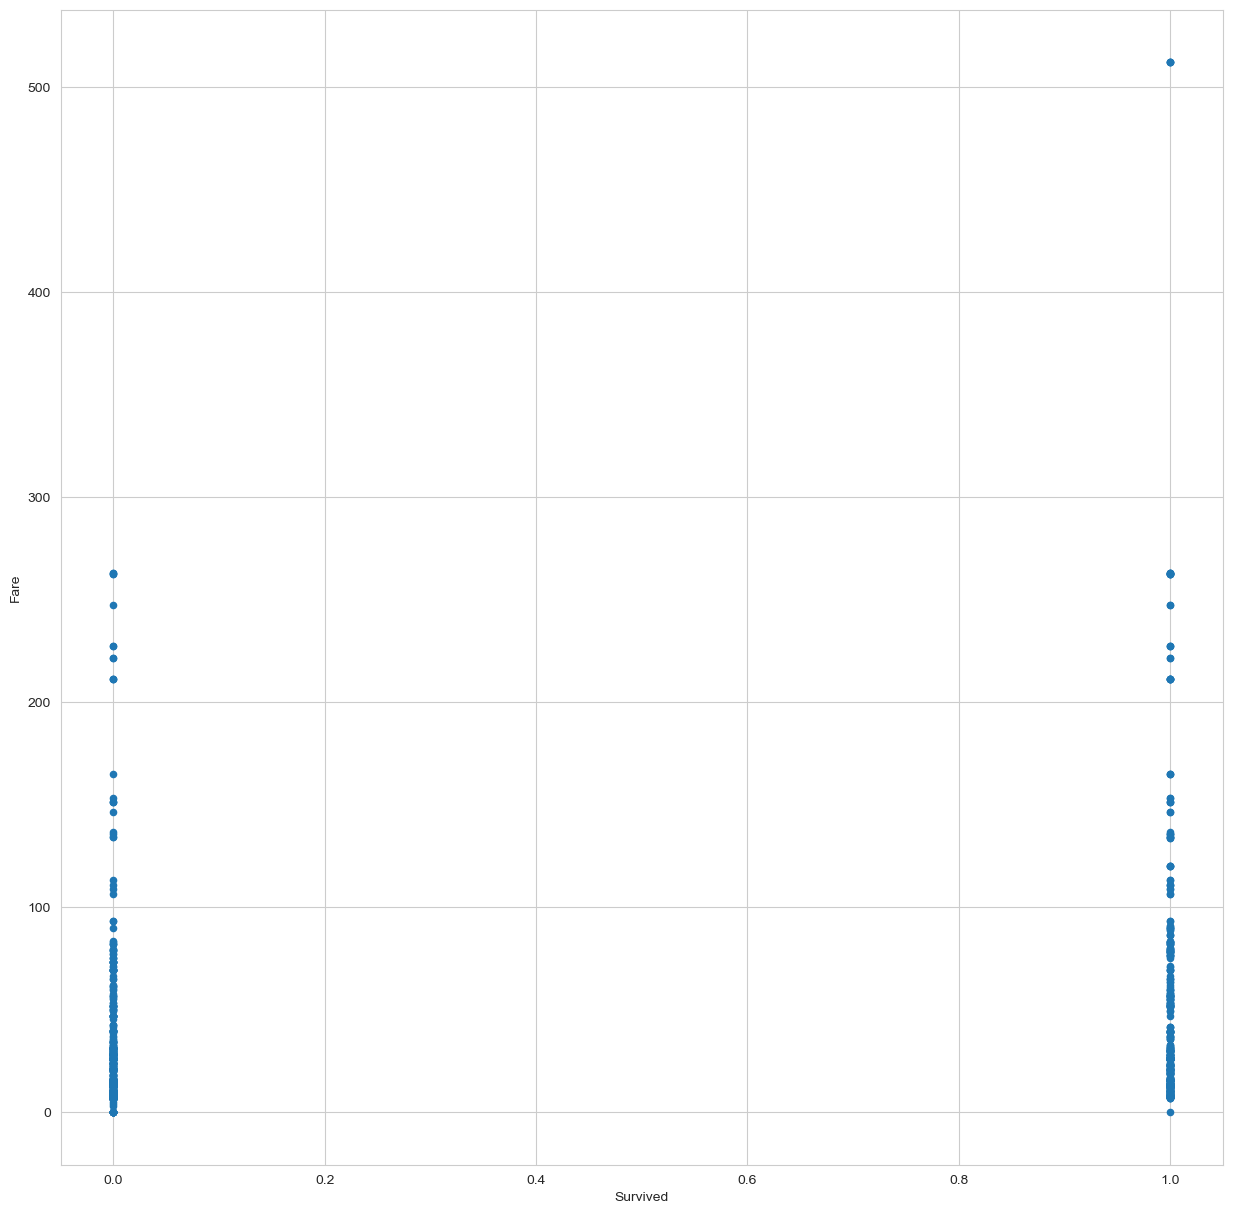

In [123]:

plt.figure(figsize=(4,4))
df_cleaned.plot(kind = 'scatter', x = 'Survived', y = 'Fare')

plt.show()

We cann observe that, fare and survival doesnt have a greate dependency on each other

# conclusion:-

Hence, we can see that the change of survival did vary with different factors such as gender, embarkation and ticket class. In gender, we see that women had higher chances of survival. In the ticket visualization, we can see that people in Class 3 had a lower chance of survival and the people in class 1 had a higher chance of survival. 